In [1]:
import pandas as pd
from sklearn import tree
import graphviz
import io
import pydot
from sklearn.model_selection import cross_val_score

In [3]:
#Read Train Data file
titanic_train = pd.read_csv('D:/Data/train.csv')

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#Let's start the journey with non categorical and non missing data columns

In [5]:
x_titanic_train = titanic_train[['Pclass','SibSp','Parch']]
y_titanic_train = titanic_train['Survived']

Build the decision tree model

In [6]:
#dt = tree.DecisionTreeClassifier()
dt = tree.DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(x_titanic_train,y_titanic_train)

Cross Validating the Output

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0)
x = cross_val_score(clf,x_titanic_train,y_titanic_train,cv=15)

In [15]:
print(x.max())
#print(help(cross_val_score))
print(x.mean())

0.8103448275862069
0.7053406065328917


Create a Graph from Decision Tree

In [25]:

#dot_data = tree.export_graphviz(dt,out_file=None)

graph_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=x_titanic_train.columns,  
                         #class_names=x_titanic_train.,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(graph_data)

graph.render('titanic_entropy')

'titanic_entropy.pdf'

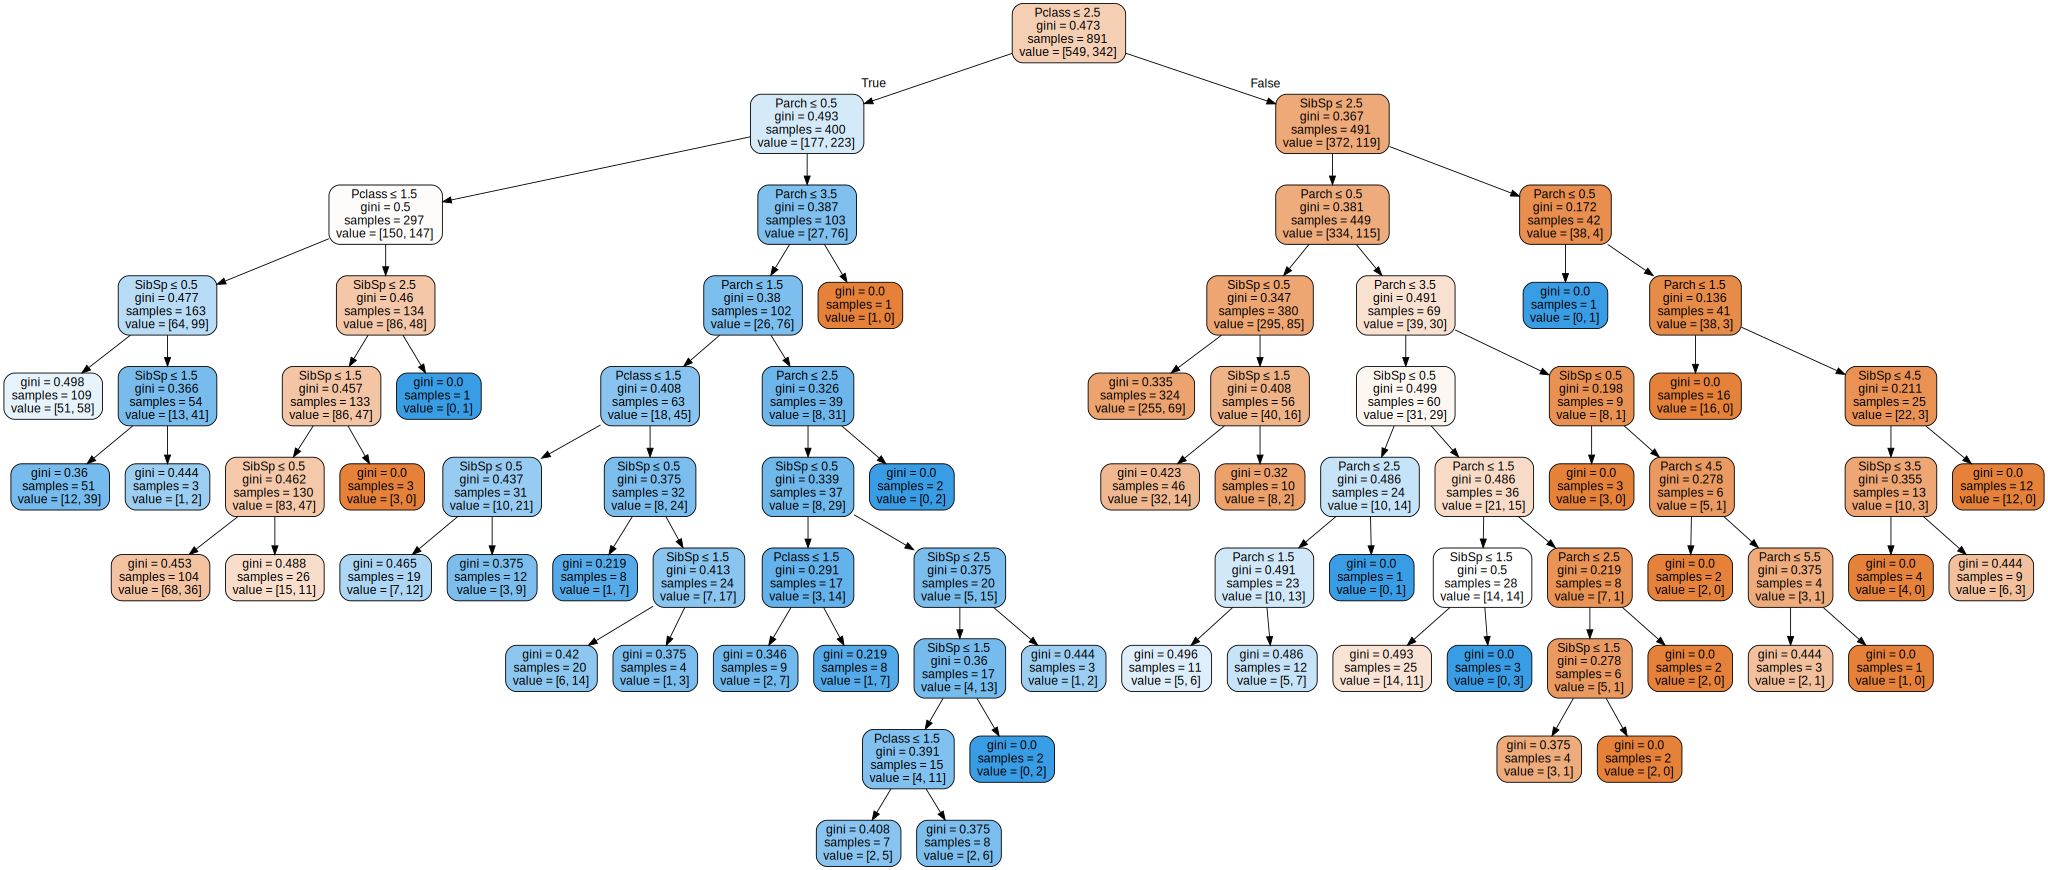

In [19]:
graph

#Predict the outcome using decision tree
#Read the Test Data

In [10]:
titanic_test = pd.read_csv('D:/Data/test.csv')
x_titanic_test = titanic_test[['Pclass','SibSp','Parch']]

#Use .predict method on Test data using the model which we buil

In [11]:
titanic_test['Survived'] = dt.predict(x_titanic_test)

In [12]:
titanic_test.to_csv("D:/Data/output.csv",columns=['PassengerId','Survived'])

In [26]:
import numpy as np

In [32]:
print(np.log2(0.1))

-3.321928094887362
